In [11]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread,imwrite
from csbdeep.models import CARE
from csbdeep.utils import normalize

import skimage.io as skio

import tensorflow as tf
import tifffile

In [2]:
## Load model

Model_Path = '/home/reyesmatte/../../groups/evocell/Octavio/CARE/models/'

with tf.device('/device:GPU:7'):
    model_2D = CARE(config=None, name='CARE_FM2FM', basedir=Model_Path)

2024-11-12 19:33:39.250593: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-11-12 19:33:39.309941: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:1a:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.75GiB deviceMemoryBandwidth: 573.69GiB/s
2024-11-12 19:33:39.310728: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:1b:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.75GiB deviceMemoryBandwidth: 573.69GiB/s
2024-11-12 19:33:39.311473: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:3d:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.75GiB deviceMemoryBan

Loading network weights from 'weights_best.h5'.


In [5]:
## Load image to process and ground truth target

img_base = tifffile.imread('CARE_comparisons/BsubtilismVenus_026_FM_subset.tif')
target = tifffile.imread('CARE_comparisons/BsubtilismVenus_026_target_subset.tif')

In [6]:
## Deconvolved the raw test image

with tf.device('/device:GPU:7'):
    y = model_2D.predict(img_base,axes='YX')

2024-11-12 19:34:18.316233: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-11-12 19:34:18.356176: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2100000000 Hz
2024-11-12 19:34:19.320593: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-11-12 19:34:37.903297: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8800
2024-11-12 19:34:43.046623: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-11-12 19:34:43.046705: W tensorflow/stream_executor/gpu/asm_compiler.cc:56] Couldn't invoke ptxas --version
2024-11-12 19:34:43.048908: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-11-12 19:34:43.049055: W tensorflow/stream_executor/gpu/redzone_allocator.cc:31

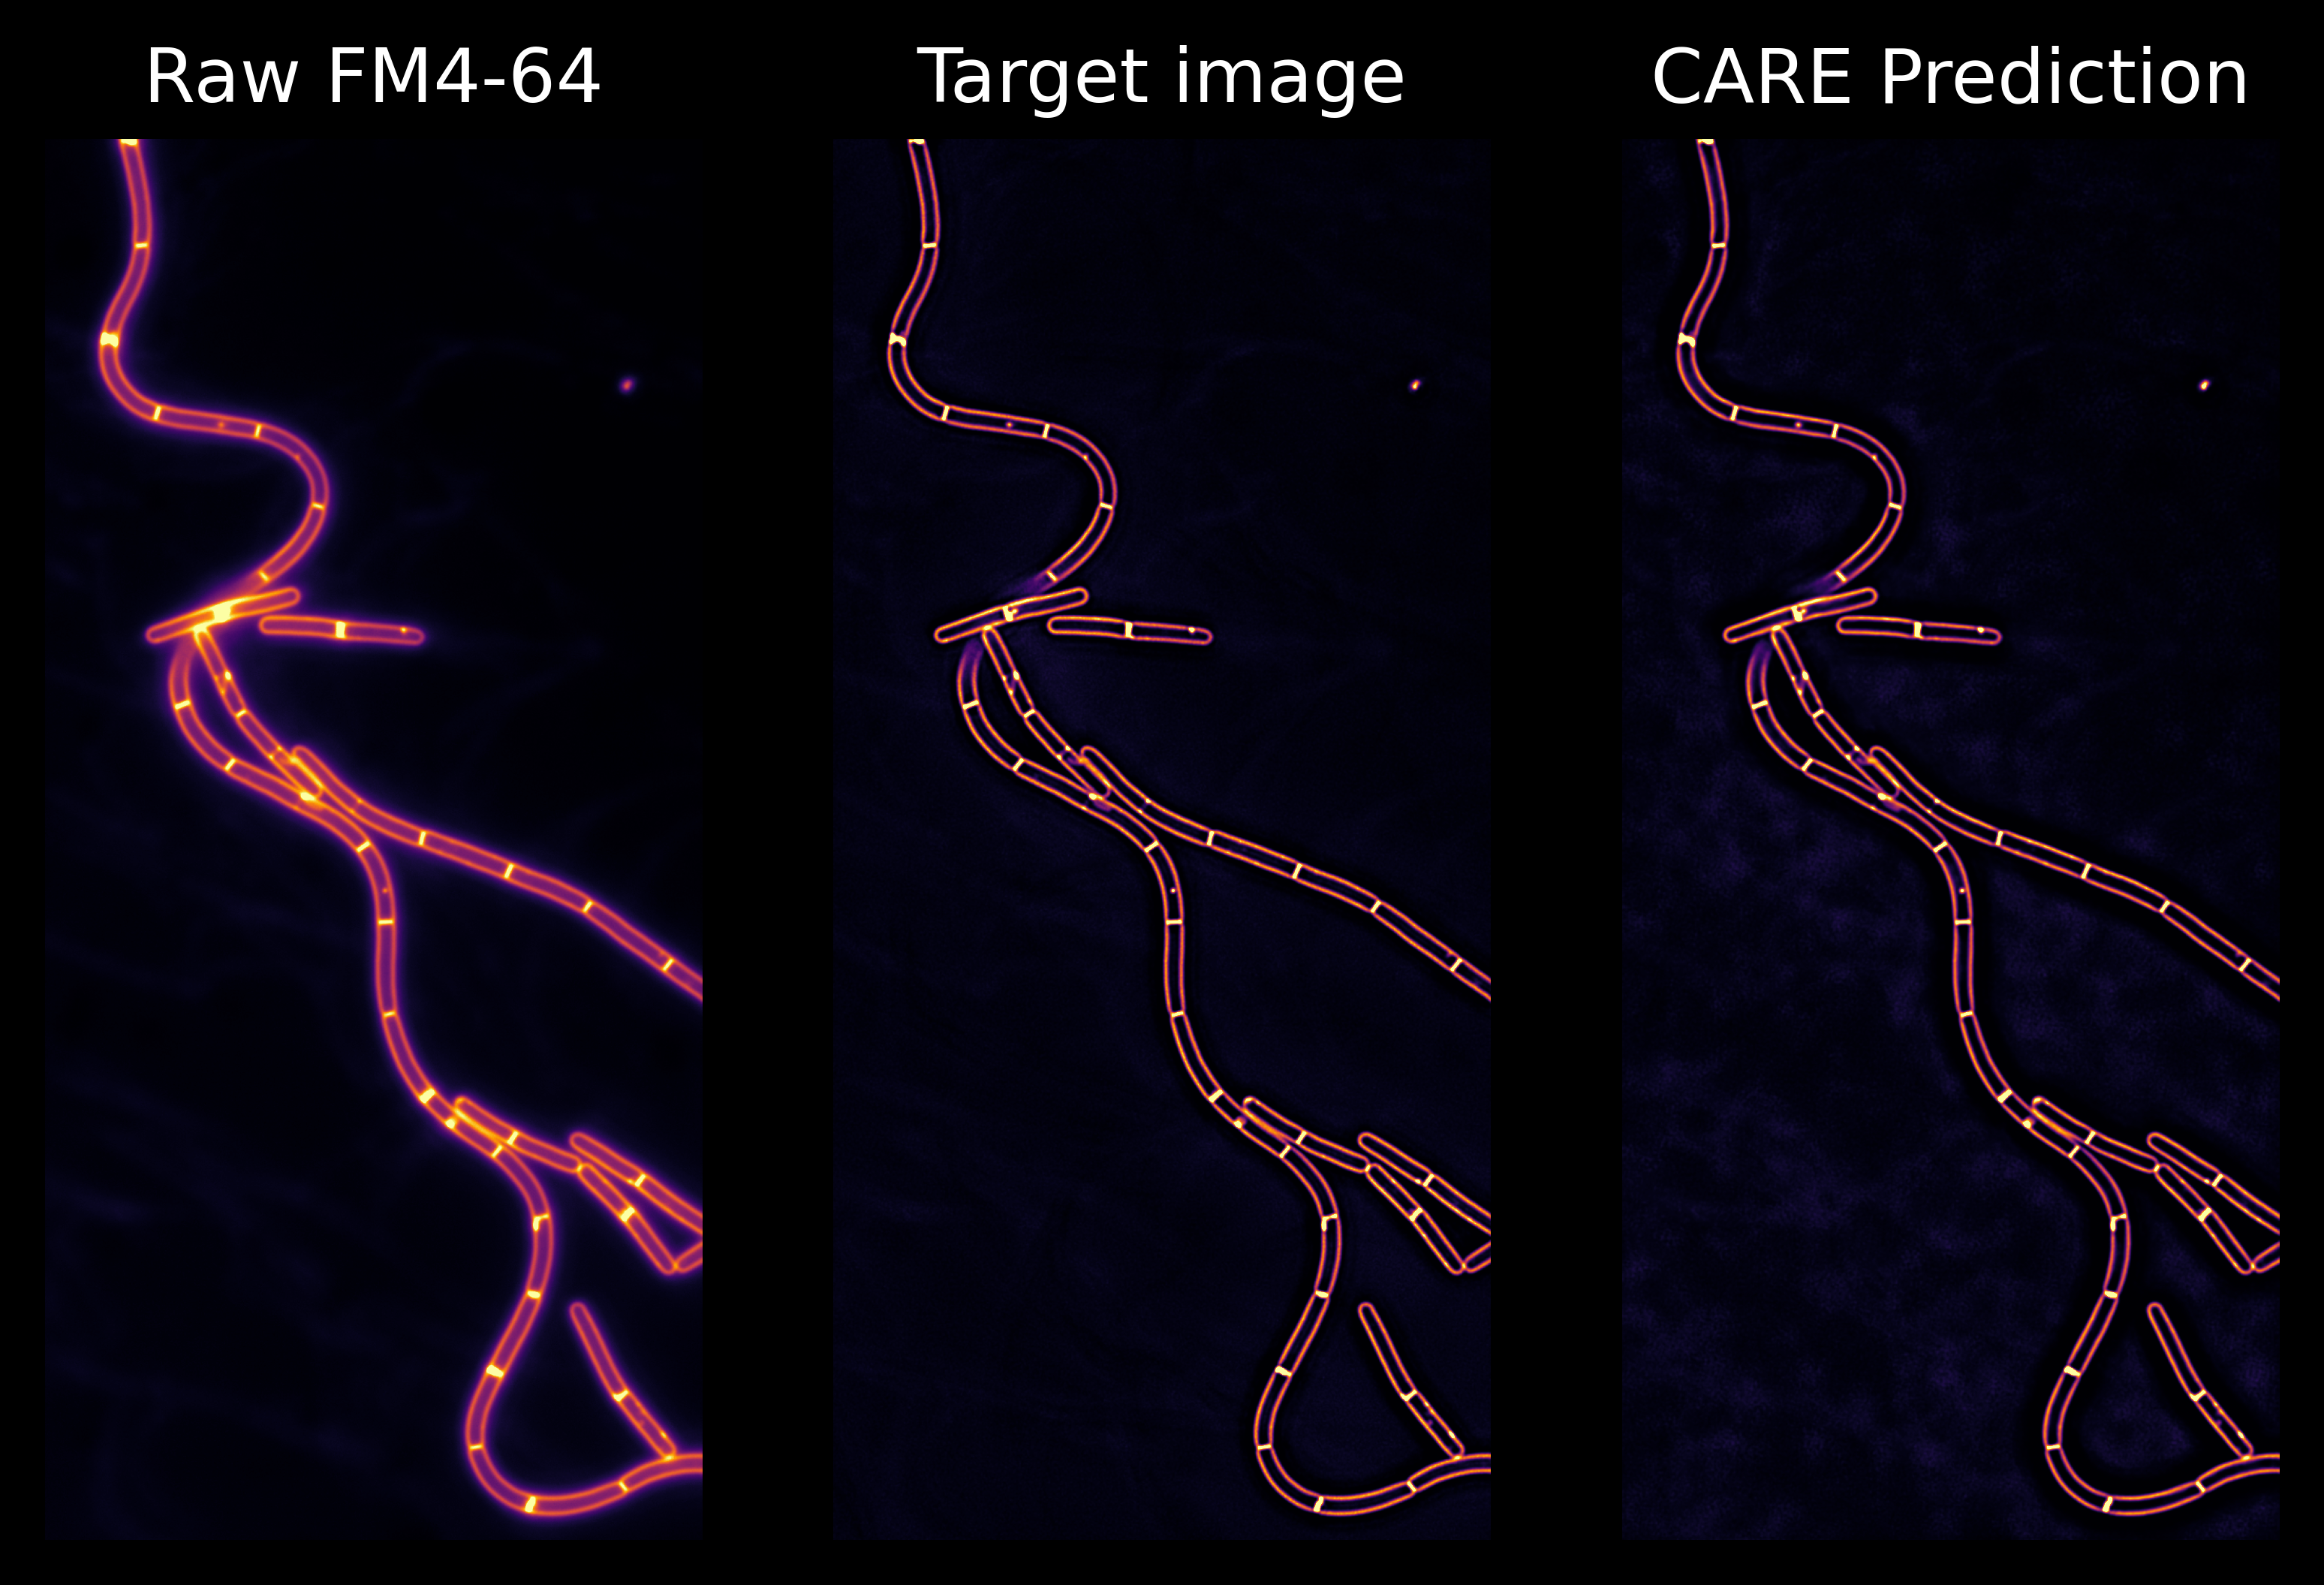

In [21]:
imgs = [img_base,target,y]
titles = ['Raw FM4-64','Target image','CARE Prediction']

# Create figure and axes
fig = plt.figure(dpi=300)
plt.style.use('dark_background')

for i,img in enumerate(imgs):
    
    ax = fig.add_subplot(1,len(imgs),(i+1))
    ax.imshow(normalize(img),cmap='inferno',vmax=1,vmin=0)
    ax.axis('off')
    ax.set_title(titles[i])
    
plt.savefig("CARE_deconvolution_prediction.png")